In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [2]:
df = pd.read_csv("../../glass-clustering.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [4]:
df.shape

(213, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518348,0.003033,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.404085,0.816662,10.73000,12.90000,13.30000,13.81000,17.38000
Mg,213.0,2.679202,1.443691,0.00000,2.09000,3.48000,3.60000,4.49000
Al,213.0,1.449484,0.495925,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655070,0.773998,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.498873,0.653185,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.954085,1.425882,5.43000,8.24000,8.60000,9.15000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000


In [6]:
scaler = StandardScaler()

In [7]:
scaled_df = scaler.fit_transform(df)

In [8]:
model = Birch()

In [9]:
cluster_labels = model.fit_predict(scaled_df)

In [10]:
df['labels'] = cluster_labels
pred = cluster_labels

In [11]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


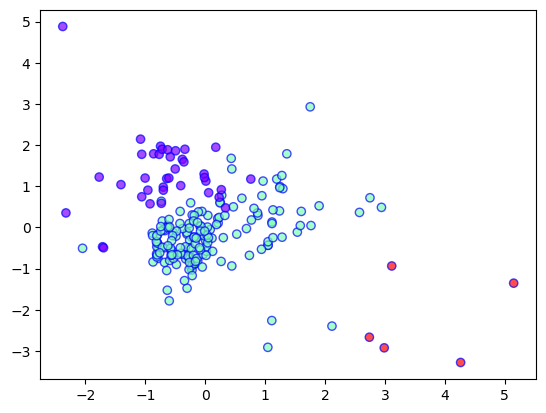

In [12]:
dataset = scaled_df
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [13]:
print(F"Silhoutte Scores : {silhouette_score(scaled_df,cluster_labels)} ")
print(F"Davies Bouldin Scores : {davies_bouldin_score(scaled_df,cluster_labels)} ")
print(F"Calinski Harabasz Scores : {calinski_harabasz_score(scaled_df,cluster_labels)} ")

Silhoutte Scores : 0.40115567353253506 
Davies Bouldin Scores : 1.2382421814791087 
Calinski Harabasz Scores : 44.08467629959793 
